## Data Preprocessing.
: 데이터 분석이나 머신러닝 모델에 적합한 형태로 데이터셋을 변환 또는 조정하는 과정

**Data Cleaning(데이터 정제)**
- 데이터셋에 있는 오류 값, 불필요한 값, 결측치, 중복 값등을 제거
**컬럼 선택 및 파생변수 생성**
- 컬럼 중 분석에 필요한 컬럼만 선택하거나, 기존 컬럼을 계산한 결과 값을 가지는 새로운 변수 생성
**Feature의 데이터 타입 반환**
- 문자열을 날짜 타입으로 변환, 범주형을 수치형으로 변환 등 원래 데이터의 형식에 맞게 변환하는 작업
  - 수치형 데이터 (Featrue Scaling) : 수치형 컬럼의 scale을 맞춰 줌
  - 범주형 데이터 인코딩 : 문자열 형태의 범주형 데이터를 숫자로 맞춰 줌


### 결측치(Missing Value)처리
- 결측치 : 수집하지 못한 값, 모르는 값, 없는 값. (NA, NaN, None, null)으로 표현

### 결측치 처리 방법

1. 결측치 삭제
    - 리스트와이즈 삭제
     - 결측치가 있는 행들을 삭제, 데이터가 충분히 크고 결측치가 많지 않을때 사용
    - 컬럼 삭제
      - 컬럼 자체에 결측치가 너무 많을 경우 컬럼 제거 할 수 있음

In [3]:
import pandas as pd
import numpy as np

data = {
    "name":['제니', '지수', '리사', '로제'],
    "age":[29, 30, np.nan, 28],
    "weight":[np.nan, 50, 47, 48]
}
df = pd.DataFrame(data)
df

,name,age,weight
0,제니,29.0,NaN
1,지수,30.0,50.0
2,리사,NaN,47.0
3,로제,28.0,48.0


In [5]:
# 결측치 확인
df.isna().sum()

name      0
age       1
weight    1
dtype: int64

In [7]:
# 제거 - 행단위 (리스트와이즈)
df.dropna()
# 제거 - 열단위
df.dropna(axis=1)

,name,age,weight
1,지수,30.0,50.0
3,로제,28.0,48.0


2. 결측치 대체 (imputation)
: 결측치를 수집하지 못해 누락된 경우, 그 값일 가능성이 가장 높은 값으로 대체 가능
    - 평균/중앙값/최빈값 대체
      : 수치형 변수의 경우 평균이나 중앙값으로, 범주형 변수의 경우 최빈값으로 결측치 대체
      1. 평균으로 대체 : 수치형 컬럼으로 outlier의 영향을 받지 않는 모델이거나 정규 분포를 따르거나 outlier가 없는 경우
      2. 중앙값으로 대체 : 수치형 컬럼으로 outlier가 존재하거나 데이터 분포가 비대칭인 컬럼 (보통 중앙값 사용)
      3. 최빈값으로 대체 : 범주형 컬럼인 경우 대표값인 최빈값으로 대체
    - 모델링 기반 대체
      : 결측치가 있는 컬럼을 output으로 결측치가 없는 행들을 input하여 결측치 예측하는 모델을 정의
      1. K-NN (K-최근접 이웃) 대체 : 결측치가 있는 데이터 포인트와 가장 가까운 K개 포인트 찾아 평균값(수치형)이나 최빈값(범주형)으로 대체
    - 결측치를 표현하는 값으로 대체
      : 나이 컬럼의 nan을 -1이나 없음으로 그 컬럼이 가질 수 없는 값을 사용

In [7]:
import pandas as pd
import numpy as np

df = pd.DataFrame([
    [0.1, 2.2, np.nan],
    [0.3, np.nan, 1],
    [np.nan, 6, 1],
    [0.08, 2.4, 1]
], columns=['A', 'B', 'C'])

org = df.copy()

In [8]:
df

,A,B,C
0,0.10,2.2,NaN
1,0.30,NaN,1.0
2,NaN,6.0,1.0
3,0.08,2.4,1.0


In [9]:
# 컬럼별 평균 대체
df['A'] = df['A'].fillna(df['A'].mean())
df

,A,B,C
0,0.10,2.2,NaN
1,0.30,NaN,1.0
2,0.16,6.0,1.0
3,0.08,2.4,1.0


In [10]:
# 컬럼별 중앙값 대체
df['B'] = df['B'].fillna(df['B'].median())
df

,A,B,C
0,0.10,2.2,NaN
1,0.30,2.4,1.0
2,0.16,6.0,1.0
3,0.08,2.4,1.0


In [11]:
df['C'] = df['C'].fillna(df['C'].mode()[0]) # mode() : Series 반환
df

,A,B,C
0,0.10,2.2,1.0
1,0.30,2.4,1.0
2,0.16,6.0,1.0
3,0.08,2.4,1.0


## Scikit-learn 전처리기 이용한 대체

### 1. SimpleImputer
- SimpleImputer는 결측값을 대체하는데 사용되는 전처리 클래스, 평균, 중앙값, 최빈값으로 대체


In [16]:
df = org.copy()

from sklearn.impute import SimpleImputer

imputer1 = SimpleImputer(strategy="median") # 중앙값
imputer2 = SimpleImputer(strategy="most_frequent") # 최빈값

imputer1.fit(df[['A', 'B']]) # 결측치를 어떤 값으로 바꿀지 학습
result1 = imputer1.transform(df[['A', 'B']]) # 변환 작업. fit에서 찾은 중앙값으로 결측치 대체

# fit transform 같은 데이터 셋인 경우 사용
result2 = imputer2.fit_transform(df['C'].to_frame()) # series.to_frame() : series->dataframe

result = np.concatenate([result1, result2], axis=1)
result

array([[0.1 , 2.2 , 1.  ],
       [0.3 , 2.4 , 1.  ],
       [0.1 , 6.  , 1.  ],
       [0.08, 2.4 , 1.  ]])

### 2. KNNImputer
- KNN 머신러닝 알고리즘 이용해 결측치 추정해서 대체
- 결측값이 있는 샘플의 최근접 이웃을 찾아 그 이웃의 값을 평균 내어 결측값 대체

In [18]:
df = org.copy()

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)  # K - 가까운 데이터 포인트 갯수 지정
result = imputer.fit_transform(df)
result

array([[0.1       , 2.2       , 1.        ],
       [0.3       , 3.53333333, 1.        ],
       [0.16      , 6.        , 1.        ],
       [0.08      , 2.4       , 1.        ]])

## 이상치(Outlier) 처리
- 데이터 집합에서 다른 관측치들과 크게 다른 값을 가지는 데이터 포인트
- 정확하게 식별하고 처리하는 것이 분석의 정확성과 신뢰성 높임
  
#### 극단치(분포에서 벗어난 값)
- 정상적인 값이지만 다른 값들과 다른 패턴을 가지는 값, 일반적으로 극단적으로 크거나 작은 값
- 처리 방법
    - 제거한다.
        - 결측치로 대체 하거나 데이터 포인트(행)를 제거한다.
        - outlier가 분석 결과에 부정적 영항을 미치는 경우.
        - outlier값이 대상 집단을 대표하지 않는다고 판단할 경우.
        - 명확히 잘못수집 된 오류값일 경우
    - 윈저화 (Winsorization)
        - 최소값과 최값을 정해 놓고 그 범위를 넘어서는 작은 값은 최소값으로 범위를 넘어서 큰 값은 최대값으로 대체한다.
    - 대체 (Imputation)
        - 평균, 중앙값, 최빈값 등으로 대체한다.


### 통계적 기준
####  1. 표준편차 기준
: 데이터가 정규분포를 따른다고 가정할때 평균으로부터 표준오차 범위 밖으로 떨어진 데이터를 outlier로  판단

\begin{align}
&정상범위\,값: \mu - k \times \sigma \ \leq value \leq \mu + k \times \sigma \\
&\mu: 평균,\, \sigma: 표준편차
\end{align}

In [2]:
import pandas as pd
import numpy as np

np.random.seed(0)

# 평균 10 표준편차 2
df = pd.DataFrame(np.random.normal(10, 2, size=(10, 3)), columns=['a', 'b', 'c'])
df.iloc[[0, 3], [0, 2]] = [[100, 200], [300, -100]]
df

,a,b,c
0,100.000000,10.800314,200.000000
1,14.481786,13.735116,8.045444
2,11.900177,9.697286,9.793562
3,300.000000,10.288087,-100.000000
4,11.522075,10.243350,10.887726
5,10.667349,12.988158,9.589683
6,10.626135,8.291809,4.894020
7,11.307237,11.728872,8.515670
8,14.539509,7.091269,10.091517
9,9.625632,13.065558,12.938718


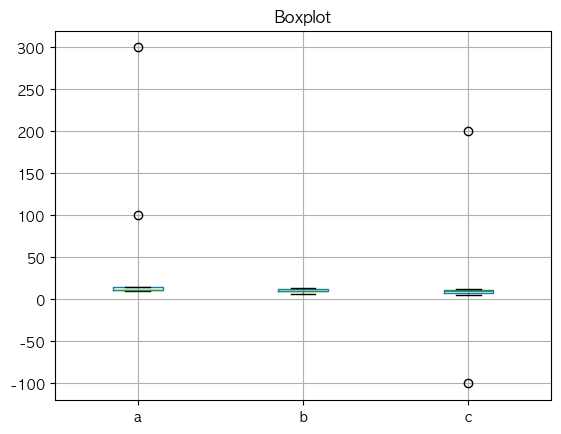

In [3]:
import matplotlib.pyplot as plt

# Boxplot을 이용해 이상치 확인
df.boxplot()
plt.title('Boxplot')
plt.show()

#### 2. 분위수 기준

-   IQR(Inter quantile Range) 을 이용해 Outlier 여부를 찾는다.
-   1분위, 3분위 에서 IQR \* 1.5 보다 더 떨어진 값을 outlier로 판단한다. 단 정상 범위를 조정하려고 할때는 1.5값을 변경할 수 있다.

\begin{align}
&IQR = 3분위 - 1분위 \\
&정상범위\,값:  (1분위 - 1.5\times IQR) \leq value \leq  (3분위 + 1.5\times IQR)
\end{align}

In [4]:
####################################################################
######## 4 분위수 기준으로 outlier를 찾기(식별)
# "1분위(100분위기준 25분위), 3분위(100분위 기준 75분위)" 계산.
# "IQR(Inter Quartile Range) = 3분위수 - 1분위수" 계산
# "정상범위: q1 - 1.5*iqr <= v <= q3 + 1.5*iqr" 조건으로 outlier를 찾기
####################################################################

# "a" 컬럼에서 outlier를 찾기
q1, q3 = df['a'].quantile(q=[0.25, 0.75]) # 1분위 3분위 찾음
iqr = q3 - q1 # 정상범위 값
whis = 1.5
iqr = iqr * whis
df['a'][~df['a'].between(q1 - iqr, q3 + iqr)]
#   ---| (1Q)  | (2Q)  | (3Q)  |--- (4Q) |c   |
#   (    정     상      값          )


0    100.0
3    300.0
Name: a, dtype: float64

###  Feature 타입 별 전처리
- **범주형(Categorical) 변수**
  : 범주를 구분하는 이름을 가지는 변수.
        -  각 값 사이에 값이 없는 이산적 특징을 가진다.
        - 값이 될 수있는 값들이 정해져 있다.
    - 명목(Norminal) 변수/비서열(Unordered) 변수
        - 범주에 속한 값간에 서열(순위)가 없는 변수
        - 성별, 혈액형, 지역
    - 순위(Ordinal) 변수/서열(Ordered) 변수
        - 범주에 속한 값 간에 서열(순위)가 있는 변수
        - 성적, 직급, 만족도


#### 범주형 데이터 전처리
- Scikit-learn의 머신러닝 API들은 Feature나 Label의 값들이 숫자(정수/실수)인 것만 처리할 수 있다.
- 문자형인 경우 숫자형으로 변환해야한다.

**범주형 Feature의 처리**
- Label Encoding
- One-Hot Encoding

### Label Encoding
- 범주형 Feature의 고유값들 오름차순 정렬 후 0부터 1씩 증가하는 값으로  변환
- **트리 계열 모델에 적용 (의사 결정 나무, 랜덤 포레스트)**
- **선형 계열 모델에 적용하면 안됨 (로지스틱 회귀, SVM, 신경망)**

**sklearn.preprocessing.LabelEncoder 사용**
1. fit(): 어떻게 변환할 지 학습
2. transform(): 문자열를 숫자로 변환
 - fit_transform(): 학습과 변환을 한번에 처리
3. inverse_transform():숫자를 문자열로 변환
4. classes_ : 인코딩한 클래스 조회

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# labelEncoder는 1차원 자료구조를 받아서 반환
items = pd.Series(['TV', '냉장고', '컴퓨터', '컴퓨터', '냉장고', '에어콘',  'TV', '에어콘'])

# instance 생성
le = LabelEncoder()

# 1. 학습
le.fit(['TV', '냉장고', '컴퓨터', '에어콘', '공기 청정기', '정수기'])

# 2. 변환
result1 = le.transform(items)
print(result1)

# 어떻게 바꿨는지 조회
print(le.classes_)

# instance 생성
le2 = LabelEncoder()

result2 =  le2.fit_transform(items)  # fit과 transform 대상 같은 경우 한번에 변환
print(result2)

le2.inverse_transform([1, 1, 1, 2, 2])

[0 2 5 5 2 3 0 3]
['TV' '공기 청정기' '냉장고' '에어콘' '정수기' '컴퓨터']
[0 1 3 3 1 2 0 2]


array(['냉장고', '냉장고', '냉장고', '에어콘', '에어콘'], dtype=object)

### adult data 에 label encoding 적용

-   Adult 데이터셋은 1994년 인구조사 데이터 베이스에서 추출한 미국 성인의 소득 데이터셋.
-   target 은 income 이며 수입이 $50,000 이하인지 초과인지 두개의 class를 가진다.

In [38]:
cols = ['age', 'workclass','fnlwgt','education', 'education-num', 'marital-status', 'occupation','relationship', 'race', 'gender','capital-gain','capital-loss', 'hours-per-week','native-country', 'income']

In [39]:
import pandas as pd

data = pd.read_csv(
    'data/adult.data', 
    header=None,
    names=cols,  # header 컬럼명
    na_values='?',  # 결측치로 읽을 값 설정 '?' => Na
    skipinitialspace=True # 값 앞의 공백 제거
)
data2 = data.copy()
data2

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [40]:
data.isnull().sum()  # 전체 결측치 확인

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [41]:
# 결측치 대체 - 최빈값
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
data[['workclass', 'occupation', 'native-country']] = imputer.fit_transform(data[['workclass', 'occupation', 'native-country']])

data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [42]:
# 범주형
category_columns = ['workclass','education','marital-status', 'occupation','relationship','race','gender','native-country', 'income']
# 수치형
number_columns = ['age','fnlwgt', 'education-num','capital-gain','capital-loss','hours-per-week']

from sklearn.preprocessing import LabelEncoder

le_dict = {}

for col in category_columns :
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    le_dict[col] = le

le_dict['workclass'].classes_

array(['Federal-gov', 'Local-gov', 'Never-worked', 'Private',
       'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'],
      dtype=object)

In [46]:
# x, y 분리
y = data['income']
X = data.drop(columns='income')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=0)

model = DecisionTreeClassifier(max_depth=5, random_state=0)

model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_valid = model.predict(X_valid)
acc_train = accuracy_score(y_train, pred_train)
acc_valid = accuracy_score(y_valid, pred_valid)

print(acc_train, acc_valid)

0.8551204530185238 0.8472168905950096


### One-Hot Encoding
:N개의 클래스를 N 차원의 One-Hot 벡터로 표현되도록 변환

- 고유값들을 피처(컬럼)로 만들고 정답에 해당하는 열은 1로 나머진 0으로 표시한다.
  
- **숫자의 크기 차이가 모델에 영향을 미치는 선형 계열 모델(로지스틱회귀, SVM, 신경망)에서 범주형 데이터 변환시 Label Encoding보다 One Hot Encoding을 사용한다.**
  
- **DecisionTree 계열의 알고리즘은 Feature에 0이 많은 경우(Sparse Matrix라고 한다.) 성능이 떨어지기 때문에 Label Encoding을 한다.**

#### One-Hot Encoding 변환 처리

-   **sklearn.preprocessing.OneHotEncoder**
    -   fit(데이터셋): 데이터셋을 기준으로 어떻게 변환할 지 학습
    -   transform(데이터셋): Argument로 받은 데이터셋을 원핫인코딩 처리
    -   fit_transform(데이터셋): 학습과 변환을 한번에 처리
    -   get_feature_names_out() : 원핫인코딩으로 변환된 Feature(컬럼)들의 이름을 반환
    -   **데이터셋은 2차원 배열을 전달 하며 Feature별로 원핫인코딩 처리한다.**
        -   DataFrame도 가능
        -   원핫인코딩 처리시 모든 타입의 값들을 다 변환한다. (연속형 값들도 변환) 그래서 변환려는 변수들만 모아서 처리해야 한다.


In [22]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

items = np.array([['TV'], ['냉장고'], ['전자레인지'], ['컴퓨터'], ['선풍기'], ['선풍기'], ['믹서'], ['믹서']])

ohe = OneHotEncoder() # 모델 객체 생성
ohe.fit(items) # 모델 학습
result = ohe.transform(items) # 모델 변환

print(ohe.get_feature_names_out()) # OHE된 컬럼이 어떤 class 고유 값을 나타내는지 조회

['x0_TV' 'x0_냉장고' 'x0_믹서' 'x0_선풍기' 'x0_전자레인지' 'x0_컴퓨터']


#### adult dataset - OHE 적용

-   **전체 Feature 중 'age', 'workclass','education', 'occupation', 'gender', 'hours-per-week', 'income' 만 사용.**
-   범주형 Feature중 **income은 출력 데이터이므로 Label Encoding 처리**를 한 뒤 y로 뺀다.
-   나머지 범주형Feature들은 One-hot encoding 처리한다.
    -   'workclass','education', 'occupation', 'gender'
- income : '<=50K' '>50K' 형태임

In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

category_columns = ['workclass', 'education', 'occupation', 'gender', 'hours-per-week', 'income']
number_columns =  ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',  'hours-per-week']

df = pd.read_csv('data/adult_imputer.csv')
df.head()

le =  LabelEncoder()
y = le.fit_transform(df['income'])
X =  df.drop(columns='income')

ohe = OneHotEncoder()
cate  = ohe.fit_transform(df[category_columns])
ohe.get_feature_names_out()

X = np.concatenate([cate.toarray(), df[number_columns].values], axis=1)
X

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=0)


model = DecisionTreeClassifier(max_depth=5, random_state=0)

model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_valid = model.predict(X_valid)
acc_train = accuracy_score(y_train, pred_train)
acc_valid = accuracy_score(y_valid, pred_valid)

print(acc_train, acc_valid)


1.0 1.0


### 수치형 데이터 전처리

- **수치형(Numeric) 변수**
    - 수량을 표현하는 값들을 가지는 변수.
    - 이산형(Discrete) 변수
        - 수치를 표현하지만 소수점의 형태로 표현되지 못하는 데이터. 정수형 값들을 가진다.
        - 예) 하루 방문 고객수, 가격(원화), 물건의 개수
    - 연속형(Continuous) 변수
        - 수치를 표현하며 소수점으로 표현가능한 데이터. 실수형 값들을 가진다.
        - 예) 키, 몸무게, 시간

### Feature Scaling(정규화)
: 각 feature들 간의 범위가 다를 경우 이 값의 범위를 일정한 범위로 맞추는 작업
- 트리 계열을 제외한 대부분의 머신러닝 알고리즘이 feature들 간의 다른 척도에 영향을 받음
    - 선형모델, SVM 모델, 신경망 모델
- **Scaling은 trainset으로 fit 함.**

#### 표준화 (Standard Scaler)
- feature의 값들이 평균이 0이고 표준편차가 1인 범위에 있도록 변환

In [32]:
from sklearn.preprocessing import StandardScaler
import numpy as np

data = np.array([[10], [2], [30]])  # ndarray 생성.

s_scaler = StandardScaler() # 객체 생성
s_scaler.fit(data) #학습
result = s_scaler.transform(data) # 변환
result

array([[-0.33968311],
       [-1.01904933],
       [ 1.35873244]])

#### MinMaxScaler
: 데이터셋의 모든 값을 0(Min value)과 1(Max value) 사이의 값으로 변환한다

In [35]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

data = np.array([[10], [2], [30]])

mm_scaler = MinMaxScaler() # 객체 생성
mm_scaler.fit(data) # 학습
result = mm_scaler.transform(data)
print(result)

mm_scaler.inverse_transform(result) # 원래 값으로 돌리기

[[0.28571429]
 [0.        ]
 [1.        ]]


array([[10.],
       [ 2.],
       [30.]])

#### 위스콘신 유방암 데이터셋으로 Scaling
- feature : 종양 측정값들 (연속형)
- target : 양성, 음성 여부

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# data load
data = load_breast_cancer()
feature = data['data']  # X
target = data['target']  # y

# scaling model instance
s_scaler = StandardScaler()
mm_scaler = MinMaxScaler()

# transform
result = s_scaler.fit_transform(feature)
result2 = mm_scaler.fit_transform(feature)

## 모델링 ---------------------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2, stratify=target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=0)

# StandardScaler 사용 ---------------------------------------------------------------------------------------------------
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train)
X_valid_scaled1 = scaler.transform(X_valid)
X_test_scaled1 = scaler.transform(X_test)

# MinMaxScaler 사용 ---------------------------------------------------------------------------------------------------
m_scaler = MinMaxScaler()
X_train_scaled2 = m_scaler.fit_transform(X_train)
X_valid_scaled2 = m_scaler.transform(X_valid)
X_test_scaled2 = m_scaler.transform(X_test)

# 평가 ---------------------------------------------------------------------------------------------------
# scaling 안한 모델
print("===================NOT Scaling=======================")
svc1 = SVC(C=0.1, gamma=0.1, random_state=0)
svc1.fit(X_train, y_train)

pred_train1 = svc1.predict(X_train)
pred_valid1 = svc1.predict(X_valid)
pred_test1 = svc1.predict(X_test)

print(accuracy_score(y_train, pred_train1))
print(accuracy_score(y_valid, pred_valid1))
print(accuracy_score(y_test, pred_test1))

# standard scaling 한 모델 --------------------------------------------------------------------------------
svc2 = SVC(C=0.1, gamma=0.1, random_state=0)
svc2.fit(X_train_scaled1, y_train)

pred_train2 = svc2.predict(X_train_scaled1)
pred_valid2 = svc2.predict(X_valid_scaled1)
pred_test2 = svc2.predict(X_test_scaled1)

print("===================StandardScaling=======================")
print(accuracy_score(y_train, pred_train2))
print(accuracy_score(y_valid, pred_valid2))
print(accuracy_score(y_test, pred_test2))

# MinMax scaling 한 모델 --------------------------------------------------------------------------------
svc3 = SVC(C=0.1, gamma=0.1, random_state=0)
svc3.fit(X_train_scaled2, y_train)

pred_train3 = svc3.predict(X_train_scaled2)
pred_valid3 = svc3.predict(X_valid_scaled2)
pred_test3 = svc3.predict(X_test_scaled2)

print("===================MinMaxScaling=======================")
print(accuracy_score(y_train, pred_train3))
print(accuracy_score(y_valid, pred_valid3))
print(accuracy_score(y_test, pred_test3))


===================NOT Scaling=======================
0.6263736263736264
0.6263736263736264
0.631578947368421
===================StandardScaling=======================
0.9560439560439561
0.9340659340659341
0.9122807017543859
===================MinMaxScaling=======================
0.9175824175824175
0.9010989010989011
0.8859649122807017
